In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

import warnings

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
dataset = pd.read_csv('HousingData.csv')

In [3]:
dataset.drop_duplicates()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
dataset.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
dataset['CRIM'].fillna(dataset['CRIM'].mean(), inplace = True)
dataset['ZN'].fillna(dataset['ZN'].mean(), inplace = True)
dataset['INDUS'].fillna(dataset['INDUS'].mean(), inplace = True)
dataset['CHAS'].fillna(dataset['CHAS'].mean(), inplace = True)
dataset['AGE'].fillna(dataset['AGE'].mean(), inplace = True)
dataset['LSTAT'].fillna(dataset['LSTAT'].mean(), inplace = True)
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
dataset.info()
print('-'*50)
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
--------------------------------------------------


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
X = dataset.drop('MEDV',1)
y = dataset['MEDV']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(303, 13) (303,)
(203, 13) (203,)


In [9]:
X_train_cv, X_cv ,y_train_cv, y_cv = train_test_split(X_test,y_test,test_size = 0.50)

In [10]:
print(X_train_cv.shape,y_train_cv.shape)
print(X_cv.shape,y_cv.shape)

(101, 13) (101,)
(102, 13) (102,)


In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
prediction = model.predict(X_test)
print(mean_absolute_error(y_test,prediction))

3.4261173974078054


Text(0.5, 0, 'prediction')

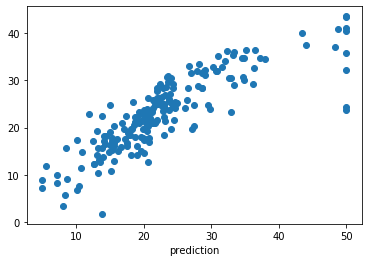

In [14]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.xlabel('prediction')

In [15]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring = "neg_mean_squared_error"
seed = 51
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setti

LR: -26.649694 (14.130883)
LASSO: -30.277631 (9.690777)
EN: -29.122722 (8.449685)
KNN: -45.917550 (10.359669)
CART: -25.912065 (12.348663)
SVR: -65.618129 (14.765194)


/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


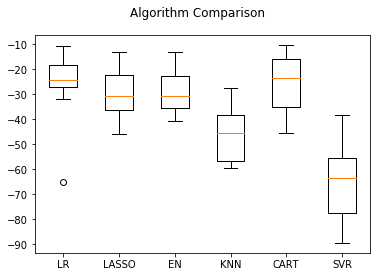

In [16]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [17]:
# SVR on Train set

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# Build parameter grid
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
# Build the model
model = SVR()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -26.283212 using {'C': 2.0, 'kernel': 'rbf'}
-28.802285 (15.300856) with: {'C': 0.1, 'kernel': 'linear'}
-55.637468 (10.872100) with: {'C': 0.1, 'kernel': 'poly'}
-67.897045 (16.924908) with: {'C': 0.1, 'kernel': 'rbf'}
-53.079804 (13.220834) with: {'C': 0.1, 'kernel': 'sigmoid'}
-27.069929 (17.002371) with: {'C': 0.3, 'kernel': 'linear'}
-49.207822 (10.434577) with: {'C': 0.3, 'kernel': 'poly'}
-52.865710 (15.389911) with: {'C': 0.3, 'kernel': 'rbf'}
-40.299914 (13.622382) with: {'C': 0.3, 'kernel': 'sigmoid'}
-27.041639 (17.483398) with: {'C': 0.5, 'kernel': 'linear'}
-46.548013 (10.526215) with: {'C': 0.5, 'kernel': 'poly'}
-44.414923 (14.604650) with: {'C': 0.5, 'kernel': 'rbf'}
-35.353941 (14.715339) with: {'C': 0.5, 'kernel': 'sigmoid'}
-27.168947 (17.739643) with: {'C': 0.7, 'kernel': 'linear'}
-45.301548 (11.567468) with: {'C': 0.7, 'kernel': 'poly'}
-38.558567 (14.228316) with: {'C': 0.7, 'kernel': 'rbf'}
-32.810639 (15.358131) with: {'C': 0.7, 'kernel': 'sigmoid'}
-27.1

In [18]:
# KNN

scaler = StandardScaler().fit(X_train_cv)
rescaledX = scaler.transform(X_train_cv)
# Build parameter grid
n_neighbour = np.arange(0,20)
param_grid = dict(n_neighbors = n_neighbour)
# Build the model
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train_cv)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected n_neighbors > 0. Got 0

  FitFailedWarning)
/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarnin

Best: -39.449349 using {'n_neighbors': 5}
nan (nan) with: {'n_neighbors': 0}
-54.733927 (39.825627) with: {'n_neighbors': 1}
-41.953532 (33.438996) with: {'n_neighbors': 2}
-44.561714 (40.123923) with: {'n_neighbors': 3}
-41.901157 (39.674547) with: {'n_neighbors': 4}
-39.449349 (37.627109) with: {'n_neighbors': 5}
-40.517202 (36.323369) with: {'n_neighbors': 6}
-42.750607 (38.301565) with: {'n_neighbors': 7}
-42.791734 (38.079246) with: {'n_neighbors': 8}
-42.428840 (36.611487) with: {'n_neighbors': 9}
-43.659742 (36.159363) with: {'n_neighbors': 10}
-43.879538 (36.413508) with: {'n_neighbors': 11}
-43.980783 (36.380272) with: {'n_neighbors': 12}
-45.300427 (37.237592) with: {'n_neighbors': 13}
-45.920458 (37.442232) with: {'n_neighbors': 14}
-46.133460 (38.458369) with: {'n_neighbors': 15}
-46.825637 (38.746722) with: {'n_neighbors': 16}
-47.138858 (38.729677) with: {'n_neighbors': 17}
-47.424775 (37.790402) with: {'n_neighbors': 18}
-47.028194 (38.065445) with: {'n_neighbors': 19}


In [19]:
# SVR on Validation set

scaler = StandardScaler().fit(X_train_cv)
rescaledX = scaler.transform(X_train_cv)
# Build parameter grid
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
# Build the model
model = SVR()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train_cv)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/Vedant/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -33.173442 using {'C': 0.9, 'kernel': 'linear'}
-35.012238 (37.266626) with: {'C': 0.1, 'kernel': 'linear'}
-53.532061 (38.552013) with: {'C': 0.1, 'kernel': 'poly'}
-70.067654 (43.740396) with: {'C': 0.1, 'kernel': 'rbf'}
-61.912137 (42.953944) with: {'C': 0.1, 'kernel': 'sigmoid'}
-33.952471 (36.770495) with: {'C': 0.3, 'kernel': 'linear'}
-47.055087 (38.798904) with: {'C': 0.3, 'kernel': 'poly'}
-64.568827 (45.099198) with: {'C': 0.3, 'kernel': 'rbf'}
-50.471723 (44.179486) with: {'C': 0.3, 'kernel': 'sigmoid'}
-33.866111 (36.350157) with: {'C': 0.5, 'kernel': 'linear'}
-48.305505 (42.943883) with: {'C': 0.5, 'kernel': 'poly'}
-60.457921 (45.971900) with: {'C': 0.5, 'kernel': 'rbf'}
-46.079263 (42.659166) with: {'C': 0.5, 'kernel': 'sigmoid'}
-33.426126 (35.435213) with: {'C': 0.7, 'kernel': 'linear'}
-48.277571 (44.199159) with: {'C': 0.7, 'kernel': 'poly'}
-57.473876 (47.190579) with: {'C': 0.7, 'kernel': 'rbf'}
-43.531478 (41.400633) with: {'C': 0.7, 'kernel': 'sigmoid'}
-3

In [20]:
model = SVR(C=0.5,kernel='linear')

In [21]:
model.fit(X_train,y_train)

SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
print(mean_absolute_error(y_test,model.predict(X_test)))

3.253514462450878


In [23]:
import pickle

In [24]:
pickle.dump(model, open('SVR_Boston_house_prive_prediction.pkl','wb'))